# Focos de Incêndios no Brasil

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
#Importando o Dataset

df = pd.read_csv('Focos_2020-01-01_2020-12-31.csv', index_col=None)
df.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6
4,2020/07/11 16:50:00,AQUA_M-T,Brasil,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7


# Manipulação e limpeza de dados com Pandas

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222797 entries, 0 to 222796
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datahora      222797 non-null  object 
 1   satelite      222797 non-null  object 
 2   pais          222797 non-null  object 
 3   estado        222797 non-null  object 
 4   municipio     222797 non-null  object 
 5   bioma         222797 non-null  object 
 6   diasemchuva   217727 non-null  float64
 7   precipitacao  217727 non-null  float64
 8   riscofogo     217727 non-null  float64
 9   latitude      222797 non-null  float64
 10  longitude     222797 non-null  float64
 11  frp           220164 non-null  float64
dtypes: float64(6), object(6)
memory usage: 20.4+ MB


In [4]:
df.shape

(222797, 12)

In [5]:
df.columns

Index(['datahora', 'satelite', 'pais', 'estado', 'municipio', 'bioma',
       'diasemchuva', 'precipitacao', 'riscofogo', 'latitude', 'longitude',
       'frp'],
      dtype='object')

In [6]:
#Cria um novo dataframe sem as colunas Satélite e País 

columns = ['satelite', 'pais']
df.drop(columns, inplace=True, axis=1)

In [7]:
#Separa a data e hora da coluna datahora e cria uma nova coluna: mês

df['datahora'] = pd.to_datetime(df['datahora'])
df['mes'] = df['datahora'].dt.strftime('%b')

In [8]:
#Exclui a coluna datahora 

columns = ['datahora']
df.drop(columns, inplace=True, axis=1)

In [9]:
#Lista as colunas e marca as que possuem algum valor nulo

print(df.isnull().any())

estado          False
municipio       False
bioma           False
diasemchuva      True
precipitacao     True
riscofogo        True
latitude        False
longitude       False
frp              True
mes             False
dtype: bool


In [10]:
#Contando a quantidade de valores faltantes por coluna:

df.isnull().sum()

estado             0
municipio          0
bioma              0
diasemchuva     5070
precipitacao    5070
riscofogo       5070
latitude           0
longitude          0
frp             2633
mes                0
dtype: int64

In [11]:
#Número total de valores ausentes:

df.isnull().sum().sum()

17843

## Tratando os dados ausentes com a mediana dos valores

#### Coluna dos Dias Sem Chuva

In [12]:
# Extrair a mediana da coluna diasemchuva
df_mediana_diasemchuva = df.diasemchuva.median()

print('Mediana: ', df_mediana_diasemchuva)

# Preencher a coluna Dias em Chuva com a mediana 
df.fillna (df_mediana_diasemchuva, inplace = True)

#Checar se há valor ausente
df.diasemchuva.isnull().sum

Mediana:  10.0


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
222792    False
222793    False
222794    False
222795    False
222796    False
Name: diasemchuva, Length: 222797, dtype: bool>

#### Coluna da Precipitação

In [13]:
#Extrair a mediana da coluna precipitacao  
df_mediana_precipitacao = df.precipitacao.median()

print('Mediana: ', df_mediana_precipitacao)

#Preencher a coluna Dias em Chuva com a mediana 
df.fillna (df_mediana_precipitacao, inplace = True)

#Checar se há valor ausente
df.precipitacao.isnull().sum

Mediana:  0.0


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
222792    False
222793    False
222794    False
222795    False
222796    False
Name: precipitacao, Length: 222797, dtype: bool>

#### Coluna de Risco de Fogo

In [14]:
# Extrair a mediana da coluna precipitacao  
df_mediana_riscofogo = df.riscofogo.median()

print('Mediana: ', df_mediana_riscofogo)

# Preencher a coluna Dias em Chuva com a mediana 
df.fillna (df_mediana_riscofogo, inplace = True)

#Checar se há valor ausente
df.riscofogo.isnull().sum

Mediana:  1.0


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
222792    False
222793    False
222794    False
222795    False
222796    False
Name: riscofogo, Length: 222797, dtype: bool>

#### Coluna de FRP

In [15]:
#Extrair a mediana da coluna frp
df_mediana_frp = df.frp.median()

print('Mediana: ', df_mediana_frp)

#Preencher a coluna Dias em Chuva com a mediana 
df.fillna (df_mediana_frp, inplace = True)

#Checar se há valor ausente
df.frp.isnull().sum

Mediana:  29.2


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
222792    False
222793    False
222794    False
222795    False
222796    False
Name: frp, Length: 222797, dtype: bool>

### Tratando Outliers em Variáveis Númericas

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222797 entries, 0 to 222796
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   estado        222797 non-null  object 
 1   municipio     222797 non-null  object 
 2   bioma         222797 non-null  object 
 3   diasemchuva   222797 non-null  float64
 4   precipitacao  222797 non-null  float64
 5   riscofogo     222797 non-null  float64
 6   latitude      222797 non-null  float64
 7   longitude     222797 non-null  float64
 8   frp           222797 non-null  float64
 9   mes           222797 non-null  object 
dtypes: float64(6), object(4)
memory usage: 17.0+ MB


#### Verificando o valor Máximo é Mínimo da coluna que representa os dias sem chuva

In [17]:
df[df['diasemchuva']==df['diasemchuva'].max()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
36251,PIAUI,FLORES DO PIAUI,Caatinga,120.0,0.0,1.0,-7.797,-42.891,13.0,Oct
36256,MARANHAO,LORETO,Cerrado,120.0,0.0,1.0,-7.009,-45.242,418.9,Oct
68819,MARANHAO,PASTOS BONS,Cerrado,120.0,0.0,1.0,-6.531,-44.108,46.7,Sep
68821,MARANHAO,PASTOS BONS,Cerrado,120.0,0.0,1.0,-6.530,-44.113,36.3,Sep
68824,MARANHAO,PASTOS BONS,Cerrado,120.0,0.0,1.0,-6.527,-44.095,27.0,Sep
...,...,...,...,...,...,...,...,...,...,...
196259,PIAUI,SAO MIGUEL DO FIDALGO,Caatinga,120.0,0.0,1.0,-7.551,-42.437,49.6,Oct
196262,BAHIA,BURITIRAMA,Cerrado,120.0,0.0,1.0,-10.468,-43.820,49.6,Oct
196287,PIAUI,SANTA CRUZ DO PIAUI,Caatinga,120.0,0.0,1.0,-7.096,-41.846,100.3,Oct
196324,PIAUI,SAO FRANCISCO DO PIAUI,Caatinga,120.0,0.0,1.0,-7.336,-42.471,22.4,Oct


In [18]:
df[df['diasemchuva']==df['diasemchuva'].min()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
166,PARA,BREVES,Amazonia,-999.0,0.0,0.2,-1.666,-50.388,7.1,Jul
358,MARANHAO,TUTOIA,Cerrado,-999.0,0.0,0.3,-2.860,-42.186,52.3,Jul
546,PARA,AFUA,Amazonia,-999.0,0.1,0.1,0.096,-50.573,6.7,Jul
588,PARA,CURRALINHO,Amazonia,-999.0,0.0,0.2,-1.522,-50.181,23.1,Jul
601,PARA,CURRALINHO,Amazonia,-999.0,0.0,0.2,-1.521,-50.168,20.5,Jul
...,...,...,...,...,...,...,...,...,...,...
222000,MARANHAO,SAO LUIS,Amazonia,-999.0,0.0,0.0,-2.729,-44.311,10.7,Jul
222076,RIO DE JANEIRO,SAO GONCALO,Mata Atlantica,-999.0,0.0,0.8,-22.880,-43.019,16.4,Jul
222077,RIO DE JANEIRO,DUQUE DE CAXIAS,Mata Atlantica,-999.0,0.0,0.9,-22.671,-43.226,12.5,Jul
222079,RIO DE JANEIRO,DUQUE DE CAXIAS,Mata Atlantica,-999.0,0.0,1.0,-22.668,-43.231,19.5,Jul


#### Verificando o valor Máximo é Mínimo da coluna que representa Precipitação

In [19]:
df[df['precipitacao']==df['precipitacao'].max()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
122773,PARA,NOVO PROGRESSO,Amazonia,0.0,125.5,0.0,-6.857,-55.727,14.4,Sep


In [20]:
df[df['precipitacao']==df['precipitacao'].min()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
0,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,Jul
1,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5,Jul
2,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0,Jul
3,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,Jul
6,TOCANTINS,PALMEIRANTE,Cerrado,39.0,0.0,1.0,-7.808,-48.028,8.3,Jul
...,...,...,...,...,...,...,...,...,...,...
222789,MATO GROSSO DO SUL,CORUMBA,Pantanal,36.0,0.0,0.7,-17.848,-57.306,43.8,Jul
222790,MATO GROSSO,DIAMANTINO,Cerrado,47.0,0.0,1.0,-13.930,-57.036,240.7,Jul
222791,RIO DE JANEIRO,RIO DE JANEIRO,Mata Atlantica,10.0,0.0,1.0,-22.856,-43.518,13.2,Jul
222792,PARA,PARAGOMINAS,Amazonia,10.0,0.0,0.3,-3.183,-47.246,12.7,Jul


#### Verificando o valor Máximo é Mínimo da coluna que representa Risco de Fogo

In [21]:
df[df['riscofogo']==df['riscofogo'].max()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
51870,ACRE,TARAUACA,Amazonia,10.0,10.0,10.0,-8.106,-70.676,21.4,Aug
51871,ACRE,FEIJO,Amazonia,10.0,10.0,10.0,-7.977,-69.956,77.6,Aug
51872,ACRE,FEIJO,Amazonia,10.0,10.0,10.0,-7.980,-69.975,14.6,Aug
51873,ACRE,FEIJO,Amazonia,10.0,10.0,10.0,-7.984,-69.943,37.6,Aug
51874,ACRE,FEIJO,Amazonia,10.0,10.0,10.0,-7.987,-69.961,43.1,Aug
...,...,...,...,...,...,...,...,...,...,...
192465,PERNAMBUCO,PESQUEIRA,Caatinga,10.0,10.0,10.0,-8.371,-36.867,21.9,Dec
192466,RIO GRANDE DO NORTE,UMARIZAL,Caatinga,10.0,10.0,10.0,-6.053,-37.831,38.6,Dec
192467,CEARA,QUIXERAMOBIM,Caatinga,10.0,10.0,10.0,-5.193,-39.452,30.7,Dec
192468,RIO GRANDE DO NORTE,UMARIZAL,Caatinga,10.0,10.0,10.0,-6.050,-37.805,24.5,Dec


In [22]:
df[df['riscofogo']==df['riscofogo'].min()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
208,SAO PAULO,MOGI GUACU,Cerrado,2.0,0.0,-999.0,-22.338,-46.942,10.9,Jul
249,MINAS GERAIS,LEOPOLDINA,Mata Atlantica,36.0,0.0,-999.0,-21.524,-42.646,5.4,Jul
254,MINAS GERAIS,NOVA SERRANA,Cerrado,39.0,0.0,-999.0,-19.889,-44.984,5.9,Jul
278,PARA,JACAREACANGA,Amazonia,10.0,0.3,-999.0,-5.586,-57.599,19.4,Jul
309,RONDONIA,ITAPUA DO OESTE,Amazonia,8.0,0.0,-999.0,-9.109,-62.819,10.0,Jul
...,...,...,...,...,...,...,...,...,...,...
222693,MATO GROSSO DO SUL,CORUMBA,Pantanal,0.0,0.0,-999.0,-18.626,-57.507,14.4,Jul
222702,MATO GROSSO DO SUL,CORUMBA,Pantanal,7.0,0.1,-999.0,-18.275,-56.501,21.0,Jul
222703,MATO GROSSO DO SUL,CORUMBA,Pantanal,5.0,0.1,-999.0,-18.273,-56.489,122.1,Jul
222704,MATO GROSSO DO SUL,CORUMBA,Pantanal,4.0,0.1,-999.0,-18.271,-56.477,18.8,Jul


#### Tratando outliers dos dias sem chuva, pois é impossivél ter menos que 0 dias sem chover durante o ano

In [23]:
df['diasemchuva'] = df.diasemchuva.mask(df.diasemchuva < 0,df.diasemchuva.median())

df[df['diasemchuva']==df['diasemchuva'].min()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
4,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7,Jul
11,ACRE,MANCIO LIMA,Amazonia,0.0,0.0,0.3,-7.612,-73.092,12.9,Jul
67,PARA,IGARAPE-MIRI,Amazonia,0.0,0.4,0.0,-2.154,-49.160,44.2,Jul
69,MARANHAO,CENTRO NOVO DO MARANHAO,Amazonia,0.0,0.2,0.9,-2.136,-46.113,14.1,Jul
100,PARA,MUANA,Amazonia,0.0,1.4,0.0,-1.335,-49.297,8.7,Jul
...,...,...,...,...,...,...,...,...,...,...
222770,PARANA,IMBAU,Mata Atlantica,0.0,0.3,0.0,-24.401,-50.797,13.3,Jul
222771,PARANA,IMBAU,Mata Atlantica,0.0,0.3,0.0,-24.395,-50.794,21.1,Jul
222774,MATO GROSSO DO SUL,ANASTACIO,Cerrado,0.0,0.6,0.8,-21.030,-55.359,35.4,Jul
222775,MATO GROSSO DO SUL,ANASTACIO,Cerrado,0.0,0.6,0.9,-21.028,-55.346,28.7,Jul


#### Tratando outliers dos risco de fogo

In [24]:
df['riscofogo'] = df.riscofogo.mask(df.riscofogo > 1,df.riscofogo.median())

df[df['riscofogo']==df['riscofogo'].max()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
0,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,Jul
3,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,Jul
6,TOCANTINS,PALMEIRANTE,Cerrado,39.0,0.0,1.0,-7.808,-48.028,8.3,Jul
8,MATO GROSSO,CAMPINAPOLIS,Cerrado,47.0,0.0,1.0,-14.347,-53.372,65.6,Jul
12,ACRE,RIO BRANCO,Amazonia,2.0,0.0,1.0,-9.991,-67.737,12.7,Jul
...,...,...,...,...,...,...,...,...,...,...
222762,RONDONIA,CANDEIAS DO JAMARI,Amazonia,7.0,0.5,1.0,-8.833,-63.526,11.9,Jul
222778,SAO PAULO,BALSAMO,Cerrado,13.0,0.0,1.0,-20.697,-49.571,52.3,Jul
222779,MATO GROSSO DO SUL,CORUMBA,Pantanal,0.0,0.0,1.0,-18.106,-56.915,29.3,Jul
222790,MATO GROSSO,DIAMANTINO,Cerrado,47.0,0.0,1.0,-13.930,-57.036,240.7,Jul


In [25]:
df['riscofogo'] = df.riscofogo.mask(df.riscofogo < 0,df.riscofogo.median())

df[df['riscofogo']==df['riscofogo'].min()]

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
5,PARA,BARCARENA,Amazonia,1.0,2.8,0.0,-1.605,-48.674,10.1,Jul
67,PARA,IGARAPE-MIRI,Amazonia,0.0,0.4,0.0,-2.154,-49.160,44.2,Jul
100,PARA,MUANA,Amazonia,0.0,1.4,0.0,-1.335,-49.297,8.7,Jul
137,PARA,MOJU,Amazonia,0.0,1.2,0.0,-2.371,-49.138,8.7,Jul
152,PARA,IGARAPE-MIRI,Amazonia,0.0,0.4,0.0,-2.155,-49.169,24.5,Jul
...,...,...,...,...,...,...,...,...,...,...
222769,PARANA,PITANGA,Mata Atlantica,0.0,4.1,0.0,-24.629,-51.659,12.7,Jul
222770,PARANA,IMBAU,Mata Atlantica,0.0,0.3,0.0,-24.401,-50.797,13.3,Jul
222771,PARANA,IMBAU,Mata Atlantica,0.0,0.3,0.0,-24.395,-50.794,21.1,Jul
222772,MATO GROSSO DO SUL,ANTONIO JOAO,Cerrado,7.0,2.3,0.0,-22.263,-56.013,7.8,Jul


### Após o Tratamento dos Dados ser conclúida:

In [26]:
#Após o tratamento, ver se todas as colunas estão sem dados ausentes

df.isnull().sum()

estado          0
municipio       0
bioma           0
diasemchuva     0
precipitacao    0
riscofogo       0
latitude        0
longitude       0
frp             0
mes             0
dtype: int64

In [27]:
#Após o tramaneto o Dataset ficou:

df

,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes
0,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,Jul
1,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5,Jul
2,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0,Jul
3,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6,Jul
4,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7,Jul
...,...,...,...,...,...,...,...,...,...,...
222792,PARA,PARAGOMINAS,Amazonia,10.0,0.0,0.3,-3.183,-47.246,12.7,Jul
222793,RIO DE JANEIRO,RIO DE JANEIRO,Mata Atlantica,10.0,0.0,0.8,-22.855,-43.508,11.1,Jul
222794,MINAS GERAIS,FORMIGA,Cerrado,11.0,0.2,0.8,-20.542,-45.689,11.2,Jul
222795,PARA,TOME-ACU,Amazonia,10.0,1.8,0.1,-2.840,-48.110,19.5,Jul


## Figuras que mostrem insights sobre os dados com pandas e matplotlib

###  1 - Tipo de Distribuição das Variáveis

array([[<AxesSubplot:title={'center':'diasemchuva'}>,
        <AxesSubplot:title={'center':'precipitacao'}>],
       [<AxesSubplot:title={'center':'riscofogo'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'frp'}>]], dtype=object)

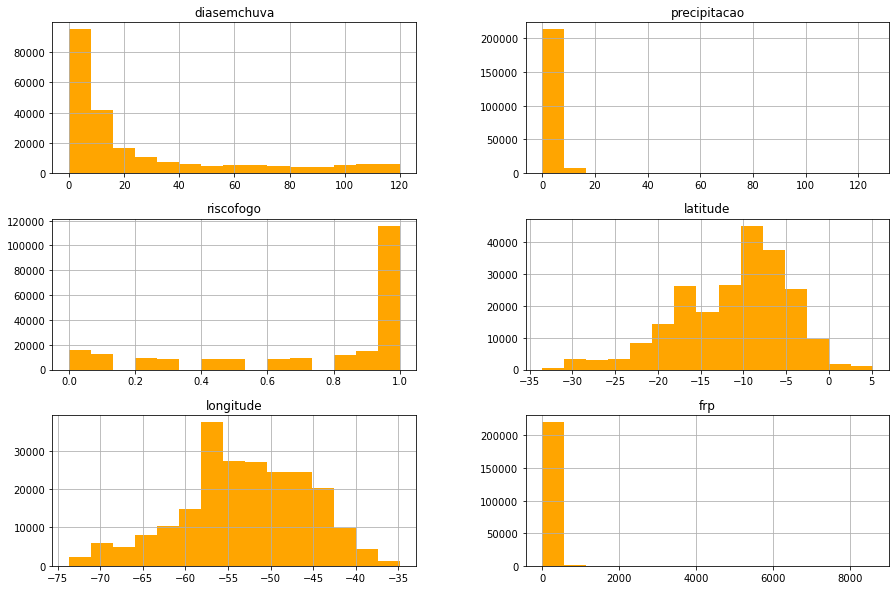

In [28]:
#plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10), color="orange")

### 2 - Quatidade de Ocorrências de Focos de Incêndio por Estado no Ano de 2020

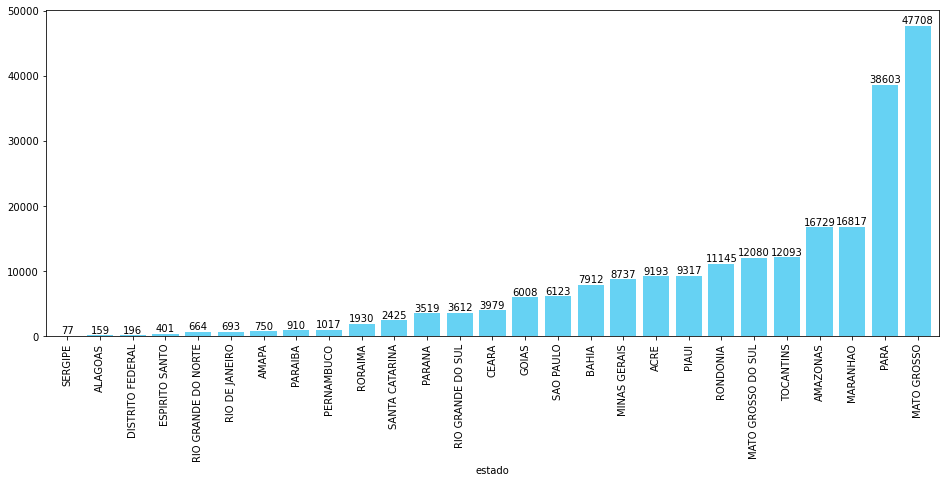

In [29]:
estados = df.groupby ('estado')['estado'].count().sort_values().plot(kind = 'bar', width=0.8, figsize=(16,6), color = [0.002, 0.709, 0.923, 0.6])

for e in estados.patches:
	b=e.get_bbox()
	estados.annotate("{:.0f}".format(b.y1+b.y0), ((b.x0 + b.x1)/2 - 0.0015, b.y1 + 300), va='baseline',color='black',ha='center')

### 3- Os 20 Municípios que mais registraram ocorrências de Focos de Incêndio em 2020

<AxesSubplot:ylabel='Municípios'>

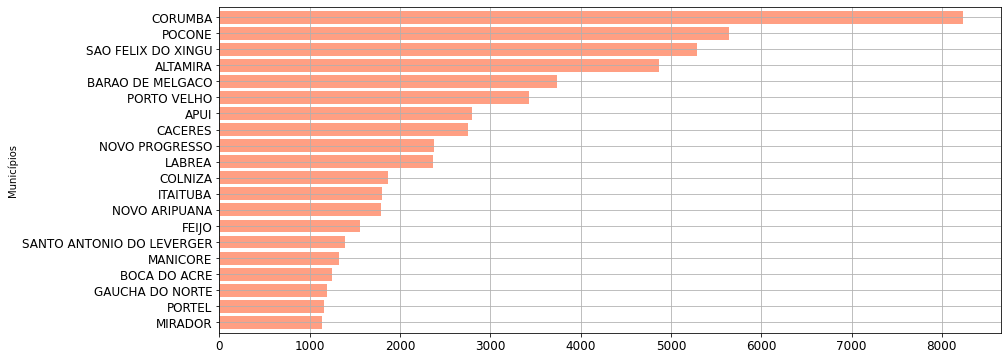

In [30]:
df.groupby(['municipio']).municipio.count().sort_values()[-20:].plot(kind='barh',
figsize=(14,6), ylabel='Quantidade de Focos de Incêndios', xlabel='Municípios', grid=True, color= [1.0, 0.373, 0.19, 0.6], fontsize=12, width=0.8)


### 4 - Distribuição dos dias sem chuva de acordo com o risco de fogo

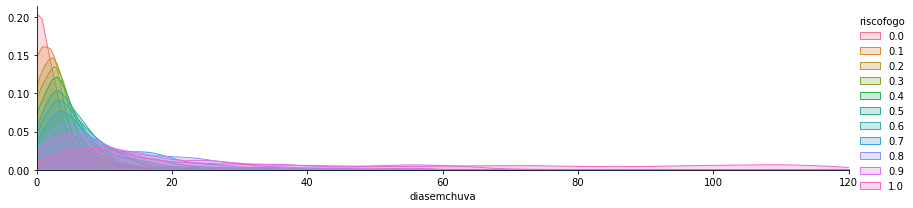

In [31]:
#Quanto maior o número de dias sem chover, maior o índice de risco de fogo

def plot_line_graph(x, hue):
    fig = sns.FacetGrid(df, hue=hue, aspect=4)
    fig.map(sns.kdeplot, x, shade=True)
    fig.set(xlim=(0, df[x].max()))
    fig.add_legend()
    return fig

plot_line_graph('diasemchuva', 'riscofogo')

### 5 - Plotagem do Risco de Fogo pela Latitude e Longitude

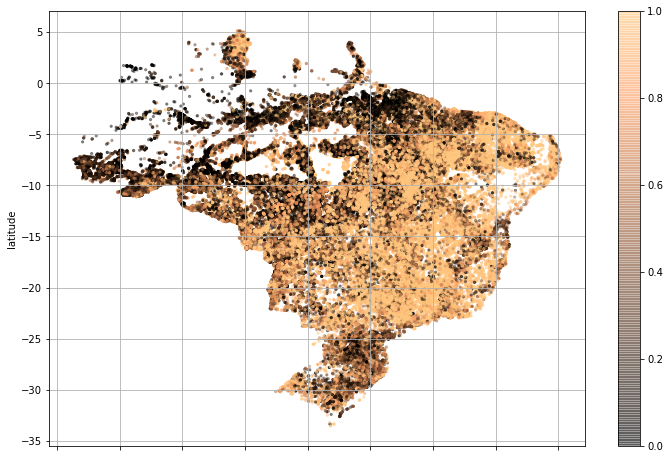

In [32]:
# O foco mais claro é o mais próximo de 0, dessa forma, são municipios com maior risco de foco de incêndio

df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, grid=True, c=df['riscofogo'], s=5,
              cmap=plot.get_cmap('copper'), figsize=(12,8));

### 6 - Comparação Entre a Quantidade do FRP e a Quantidade de Dias sem Chover

###### FRP (sigla em inglês para Potência Radiativa do Fogo): essa medida demonstra a energia emitida. Por exemplo, o fogo proveniente de desmatamento, possui emissão enegértica maior e consequentemente o FRP é maior.

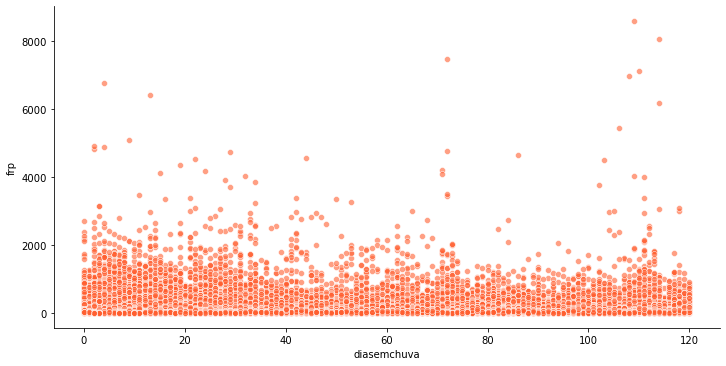

In [33]:
sns.relplot(x='diasemchuva', y='frp', data=df, aspect=2.0, color= [1.0, 0.373, 0.19, 0.6])

###### Quanto maior a quantidade de dias sem chover, maior o FRP.

### 7 - Quantidade de Focos de Incêndios por Mês

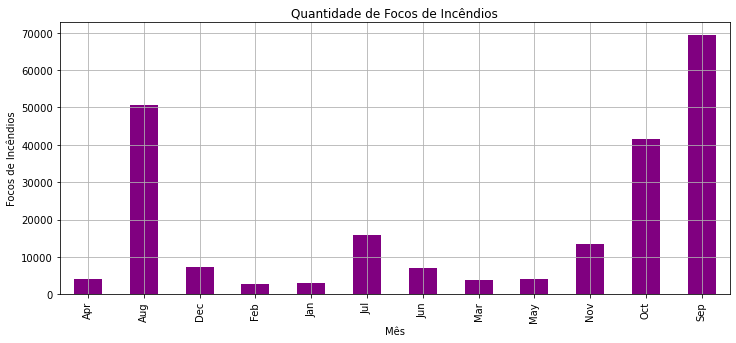

In [34]:
d = df.groupby('mes')['mes'].count().plot(kind='bar', color='purple', figsize=(12,5), grid=True)

plot.title('Quantidade de Focos de Incêndios')
plot.xlabel('Mês')
plot.ylabel('Focos de Incêndios')
plot.show()

# Quebrando os dados em conjunto de treino e conjunto de teste

In [35]:
# Separando os Outputs.
columns = ['municipio', 'estado', 'bioma', 'mes', 'riscofogo']

X = df.drop(columns, axis=1)
y = df.bioma

# Treinando um estimador scikit-learn de aprendizagem supervisionada (Classificador)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Criando o Classificador. 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

In [ ]:
# Avaliando o Classificador na divisão do conjuto de teste e conjunto de treinamento.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3)
X_test.shape, X_train.shape

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Treinanto e teste.
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

accuracy_score(y_test, knn2.predict(X_test))

In [ ]:
# Pré processando os inputs

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm

In [ ]:
# Verificando se houve melhoria na qualidade do classificador

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=2/3)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

accuracy_score(y_test, knn3.predict(X_test))